In [44]:
import pandas as pd
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
PARAMETERS_FILE = '../parameters.json'

with open(PARAMETERS_FILE) as f:
    parameters = json.load(f)

pattern = r'/playlist/([^/?]+)'

playlist_id = list()

for url in parameters['playlist_id']:
    match = re.search(pattern, url)

    if match:
        playlist_id.append(match.group(1))

In [46]:
data = dict()

for _id in playlist_id:
    with open(f"../data/metadata/{_id}.json") as f:
        data[_id] = json.load(f)

In [47]:
_id = "3bxNKleDijOT6Did05jINs"

df = pd.read_json(f'../data/metadata/{_id}.json')

df.head()

,id,name,album,artist,genres,related_artists,related_genres,generic_genres,release_date,duration_ms,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,6mjHiGwrRGE8LVCXVc5QDU,Out Of Control,The Reason (15th Anniversary Deluxe),Hoobastank,"[alternative metal, funk metal, nu metal, pop ...","[12 Stones, Crossfade, Seether, Sick Puppies, ...","[rap metal, christian rock, rock, canadian roc...","[metal, metal, metal, pop, rock, post-grunge, ...",2003-12-09,162106,...,0.973,0.000000,4,0.3530,-4.386,0,0.1330,157.872,4,0.458
1,7iL6o9tox1zgHpKUfh9vuC,In Da Club,Get Rich Or Die Tryin',50 Cent,"[east coast hip hop, gangster rap, hip hop, po...","[G-Unit, The Game, Lloyd Banks, Obie Trice, D1...","[atl hip hop, dirty south rap, singeli, bronx ...","[hip hop, rap, hip hop, pop, rap, hip hop, rap...",2003-02-06,193466,...,0.713,0.000000,6,0.0708,-2.752,0,0.3660,90.051,4,0.777
2,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,The Marshall Mathers LP,Eminem,"[detroit hip hop, hip hop, rap]","[D12, The Game, Bad Meets Evil, DMX, Dr. Dre, ...","[atl hip hop, pop rap, nyc rap, old school atl...","[hip hop, hip hop, rap, hip hop, pop, rap, rap...",2000-05-23,284200,...,0.661,0.000000,5,0.0454,-4.244,0,0.0572,104.504,4,0.760
3,45hOioMDJktr86iKDHC8gr,Girlfriend,The Best Damn Thing (Expanded Edition),Avril Lavigne,"[canadian pop, candy pop, pop]","[Selena Gomez & The Scene, The Veronicas, Kell...","[girl group, neo mellow, post-teen pop, pop ro...","[pop, pop, pop, pop, pop, rock, pop, dance, pop]",2007-04-17,216600,...,0.959,0.000221,7,0.2090,-2.433,1,0.1020,163.983,4,0.669
4,3avYqdwHKEq8beXbeWCKqJ,Last Friday Night (T.G.I.F.),Teenage Dream,Katy Perry,[pop],"[Fifth Harmony, Jessie J, Selena Gomez, Camila...","[candy pop, electropop, girl group, uk pop, me...","[pop, pop, pop, electro, electropop, pop, pop,...",2010-01-01,230733,...,0.812,0.000030,3,0.6670,-3.797,0,0.0409,126.023,4,0.720


In [48]:
df.describe()

,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,236317.060000,66.19000,0.092839,0.673060,0.797710,0.005494,5.190000,0.208427,-4.669650,0.480000,0.115606,117.936870,4.030000,0.594560
std,46774.983832,25.25694,0.121729,0.153941,0.130656,0.031782,3.802431,0.154800,1.586635,0.502117,0.100792,26.746773,0.222702,0.213589
min,151013.000000,0.00000,0.000011,0.111000,0.406000,0.000000,0.000000,0.023400,-10.064000,0.000000,0.027000,65.043000,3.000000,0.059000
25%,206526.000000,60.25000,0.005380,0.579000,0.729750,0.000000,1.000000,0.085250,-5.643000,0.000000,0.047025,96.737250,4.000000,0.455000
50%,230299.500000,77.00000,0.030150,0.689000,0.809500,0.000000,5.000000,0.156000,-4.579500,0.000000,0.069000,116.473500,4.000000,0.627000
75%,255736.250000,83.25000,0.131250,0.781000,0.909000,0.000021,8.250000,0.303250,-3.724250,1.000000,0.145750,130.003500,4.000000,0.754750
max,439213.000000,89.00000,0.529000,0.949000,0.985000,0.293000,11.000000,0.799000,-1.190000,1.000000,0.499000,200.074000,5.000000,0.965000


## Data Analysis

### Popularity

In [49]:
artist_popularity = df.groupby("artist").count().sort_values(by="name", ascending=False)["name"][:5]

artist_popularity

artist
Eminem           7
Big Time Rush    6
Katy Perry       5
Avril Lavigne    4
50 Cent          3
Name: name, dtype: int64

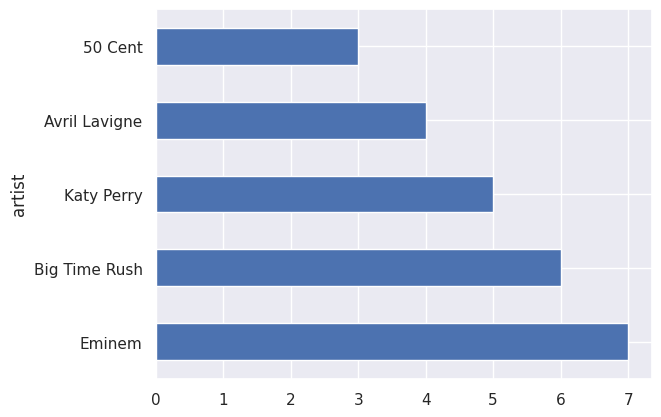

In [50]:
artist_popularity.plot.barh()
plt.show()

### Loudness

In [51]:
loudness = df[["loudness", "name"]].sort_values(by="loudness")

loudness

,loudness,name
8,-10.064,Candy Shop
66,-10.050,Gangsta's Paradise
27,-7.858,Stronger
43,-7.531,Lonely
32,-7.470,Get Low
...,...,...
25,-2.261,Hey Ya!
5,-2.221,Hollaback Girl
49,-2.180,Crank That (Soulja Boy)
26,-1.538,Empire State Of Mind


ValueError: could not convert string to float: 'Candy Shop'

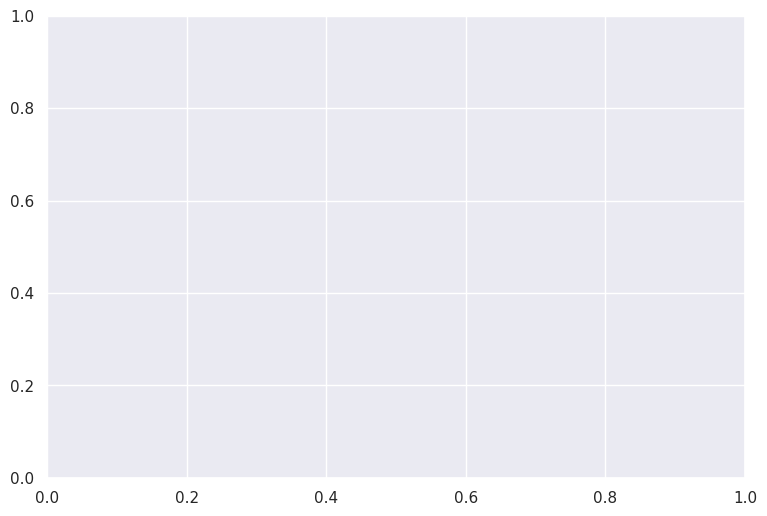

In [53]:
sns.set_theme()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(loudness, annot=True, fmt="d", linewidths=.5, ax=ax)